Praktikum Digitale Signalverarbeitung
=====================================

**Author:** Prof. Dr.-Ing. Johann-Markus Batke

**Date:** SS 2024



## Vorbereitung



1.  Drücken Sie mit Hilfe der Abtastrate $f_s$ die Dauer $T$ eines
    diskreten Abtastschritts $n$ aus! Geben Sie die Zeit für einen
    Schritt $n$ in ms an, wenn $f_s = 8000$ Hz
    beträgt!

2.  Die normierten Frequenzen einer DFT betragen $k/N$, also $k$
    Schwingungen pro $N$ Abtastwerte. Stellen Sie eine Funktion $f(k)$
    auf, um die Frequenz zur Stützstelle $k$ in Abhängigkeit von der
    Abtastrate $f_{s}$ in Hertz auszudrücken.
    
    Welche Frequenz hat die Stützstelle $k=3$, wenn das Signal mit
    einer Abtastrate von $f_s = 8000$ Hz abgetastet worden ist
    und $N = 512$ gilt?

3.  Vergegenwärtigen Sie sich, wie eine Funktion darstellt wird, wenn
    die Achsen zur Darstellung linear oder logaritmisch geteilt
    werden. Beachten Sie dazu auch die unten aufgeführten Befehle wie
    `semilogx()` und `log10()`.

4.  Erstellen Sie die wav-Datei eines kurzen Sprachsignals mit
    möglichst allen Vokalen "a e i o u", indem Sie einen Satz sprechen und
    aufnehmen (Bsp: "Und Gott sprach: Es werde Licht!"). **Diese Datei
    ist zur Versuchsdurchführung bereit zu halten.**
    
    Identifizieren Sie mit einem Audioeditor (z.B. audacity) einen
    Zeitabschnitt, wo ein Vokal im Signal vorkommt. Notieren Sie Beginn
    und Ende dieses Zeitabschnitts und rechnen Sie diese Zeiten in die
    Indizes der Abtastwerte um!
    
    Beispiel:
    
    
    | Vokal|$t$ /s Beginn|$t$ /s Ende|n  Beginn|n Ende|
    |---|---|---|---|---|
    | 'a'|0.1|0.156|800|1248|
    | 'e'|3.2|3.9|25600|31200|



## Aufgaben



### Signaldarstellung im Zeitbereich



1.  Stellen Sie das Signal $x[n]$ Ihrer wav-Datei für einen kurzen
    Zeitabschnitt dar (etwa < 5 s), so dass die charakteristische
    Wellenform erkennbar wird. Wählen Sie für die Zeitachse die Einheit
    Sekunden.

2.  Stellen Sie weiterhin den in der Vorbereitung identifizierten Vokal
    als Zeitsignal $x_v[n]$ mit den entsprechenden Indizes dar.



### Signaldarstellung im Frequenzbereich



Wählen Sie als DFT-Ordnung 1024 Punkte.

1.  Stellen Sie das Spektrum $X(f)$ zum Zeitsignal $x_v[n]$  linear von 0
    bis $f_s$ dar.

2.  Stellen Sie die Amplitude des Spektrums $X(f)$ linear und im
    Frequenzbereich logaritmisch bis $f_s/2$ dar.

3.  Stellen Sie das Signal doppelt-logaritmisch dar (Frequenz
    logaritmisch bis $f_{s}/2$, Amplitude in dB).

Abbildung [6](#orga8e9466) zeigt ein Beispiel einer möglichen Ausgabe.

![img](./spektrum.png "Die Darstellung des Spektrums zum Vokal "o". oben: linear; mittig: semilogarithmisch; unten: doppelt logarithmisch.")



### Signalanalyse



Lesen Sie die Grundfrequenz aus der spektralen Darstellung des gewählten Vokals ab. Entspricht die gefundene Frequenz Ihrer Sprechstimme?



## Python



Nachfolgend sind einige Möglichkeiten der Programmierung in Python dargestellt.  Weitere Anregungen zur Darstellung von Signalen und Lösungshinweise finden sie in (Werner 2012).



### Berechnung der DFT



Die Berechnung der DFT erfolgt mithilfe des Moduls `np.fft`. Die Transformation in den Frequenzbereich erfolgt mit `np.fft.fft`, die Transformation in den Zeitbereich mit `np.fft.ifft`.

Für eine Folge von Einsen lässt sich so der Gleichanteil berechnen:



Text(0, 0.5, '$|X[k]|$')

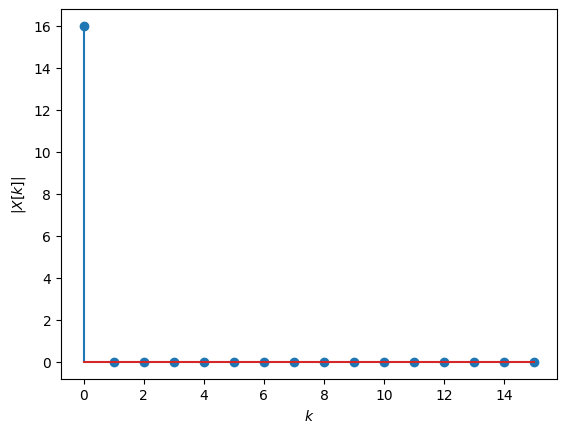

In [1]:
N = 16
x_N = np.ones(N)
X_N = np.fft.fft(x_N)
plt.stem(np.abs(X_N))
plt.xlabel("$k$")
plt.ylabel("$|X[k]|$")

Generiert man ein Spektrum, lässt sich per Rücktransformation ein Zeitsignal erzeugen:



Text(0, 0.5, '$y[n]$')

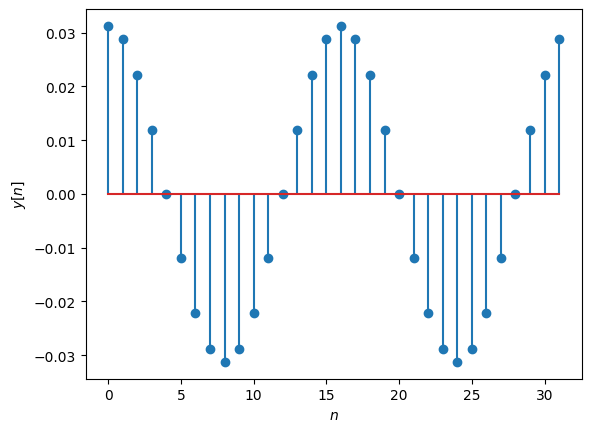

In [1]:
N = 32
Y_N = np.zeros(N)
Y_N[2] = 1
y_N = np.fft.ifft(Y_N)
plt.stem(np.real(y_N))
plt.xlabel("$n$")
plt.ylabel("$y[n]$")

### Indizierung



Auf Vektor- bzw. Matrixelemente kann zugegriffen werden per der Variable nachgestelltem Index in eckigen Klammern. Die Indizes müssen direkt als Zahl eingegeben werden. Werden Indizes berechnet und stehen in einer Variable, stellt dies ein Problem dar.  *Variablen mit Indizes* können per `np.ix_` übergeben werden.



In [1]:
a_MM = np.zeros((4, 4))
ind=[1,3]
a_MM[np.ix_(ind,ind)]+=100
a_MM

array([[  0.,   0.,   0.,   0.],
       [  0., 100.,   0., 100.],
       [  0.,   0.,   0.,   0.],
       [  0., 100.,   0., 100.]])

### Weitere Befehle



Weitere Befehle im Modul Numpy, die im Rahmen dieses Versuchs benötigt werden könnten, sind:


| <code>semilogx(), log10(), abs(), angle(), real(), imag()</code>|

<style>.csl-entry{text-indent: -1.5em; margin-left: 1.5em;}</style><div class="csl-bib-body">
</div>

Werner, Martin. 2012. Digitale Signalverarbeitung mit Matlab®. Springer Science + Business Media. [https://doi.org/10.1007/978-3-8348-8621-7](https://doi.org/10.1007/978-3-8348-8621-7).

